In [127]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 12 20:42:14 2022

@author: Fred Coerver
"""
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import sys
import os
import datetime
import time
import matplotlib as plt
from matplotlib import pyplot as plt
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
pd.options.display.float_format = '{:,.6f}'.format

#Userdefined module
from fad_v03 import Get_SandD

######################### READ DATA #################################################

td = pd.read_excel("./Testdata_inout2.xlsx",sheet_name="inputdata",usecols="B:C")


In [128]:
cwd = os.getcwd()
cwd

'C:\\Users\\Fred_Miriam\\anaconda\\Lib\\ML_data\\Fast-Anomaly-Detection-main'

In [129]:
td[td["x-value"]==3.25]

,x-value,y-value
29,3.250000,5.000000


In [130]:
writer = pd.ExcelWriter("./Testdata.xlsx")
######################### INITIALIZE DATA   #########################################
kpi_input = td.columns.to_list()
t=1
P1inc= 30
accuracy = 8
window_sizeleft = 3
window_sizeright= 3
Time_scale=False
ignore_startsamples = 4
ignore_endsamples = 4
td_in = td[[kpi_input[0],kpi_input[t]]]
td_in = td

##########################  CALL MODULE   ###########################################
dfSin_gl, spikelist_gl = Get_SandD(td_in,
                                   acc=accuracy,
                                   windowsizeleft=window_sizeleft,
                                   windowsizeright=window_sizeright,
                                   sp_name=kpi_input[t],
                                   P1=P1inc,
                                   ignorestartsamples = ignore_startsamples,
                                   ignoreendsamples = ignore_endsamples,
                                   Timescale=Time_scale
                                   )

##########################    write data to excel   #################################
dfSin_gl.to_excel(writer,sheet_name="Sheet4")  
spikelist_gl.to_excel(writer,sheet_name="Sheet5") 
writer.save()
writer.close()

In [131]:
td[0:3]

,x-value,y-value,KPI_name,Regr_value,Value,Unixtime,Std,spike,spikevalue,Slope,Intercept,Diff,Regr_value_plus_std,Regr_value_min_std
0,-4.000000,-0.000000,y-value,0.000000,0.000000,0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-3.750000,-1.435063,y-value,0.000000,0.000000,0,1.000000,0.000000,-1.435063,1.000000,1.000000,1.000000,1.000000,1.000000
2,-3.500000,-2.474874,y-value,0.000000,0.000000,0,1.000000,0.000000,-2.474874,1.000000,1.000000,1.000000,1.000000,1.000000


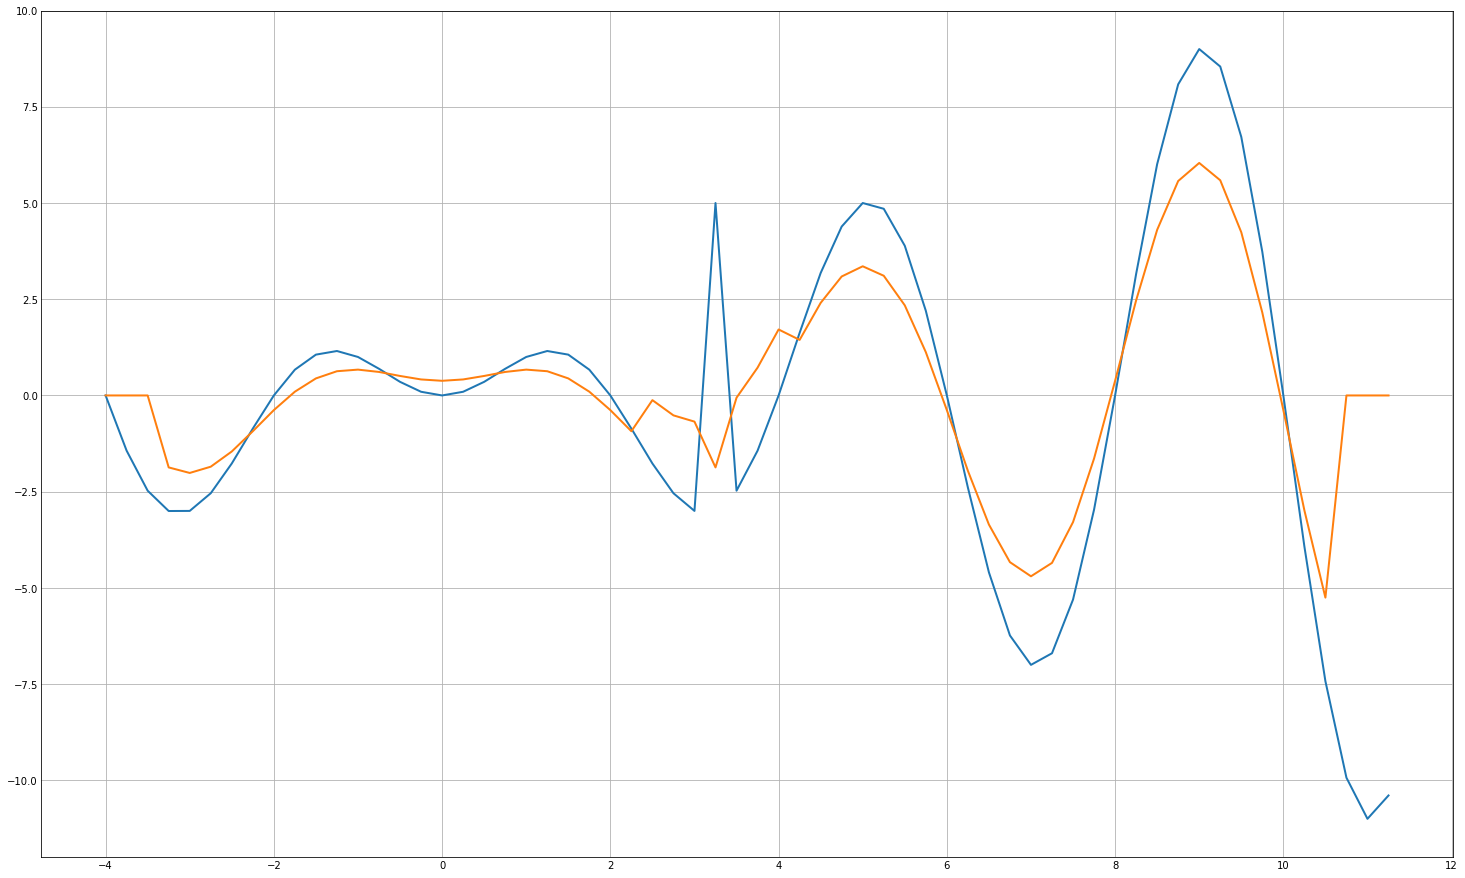

In [132]:
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(td_in["x-value"],td_in["y-value"], linewidth=2.0)
ax.plot(td_in["x-value"],td_in["Regr_value"], linewidth=2.0)

In [133]:
td_in

,x-value,y-value,KPI_name,Regr_value,Value,Unixtime,Std,spike,spikevalue,Slope,Intercept,Diff,Regr_value_plus_std,Regr_value_min_std
0,-4.000000,-0.000000,y-value,0.000000,0.000000,0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-3.750000,-1.435063,y-value,0.000000,0.000000,0,1.000000,0.000000,-1.435063,1.000000,1.000000,1.000000,1.000000,1.000000
2,-3.500000,-2.474874,y-value,0.000000,0.000000,0,1.000000,0.000000,-2.474874,1.000000,1.000000,1.000000,1.000000,1.000000
3,-3.250000,-3.002608,y-value,-1.869729,0.000000,0,0.761651,0.000000,-3.002608,-1.148520,-5.602418,1.132880,4.223475,-7.962933
4,-3.000000,-3.000000,y-value,-2.013670,0.000000,0,0.674518,0.000000,-3.000000,0.514033,-0.471572,0.986330,3.382477,-7.409816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,10.250000,-3.922505,y-value,-2.984608,0.000000,0,0.856505,0.000000,-3.922505,-12.557557,125.730355,0.937897,3.867430,-9.836646
58,10.500000,-7.424621,y-value,-5.252782,0.000000,0,1.554593,0.000000,-7.424621,-10.054803,100.322655,2.171839,7.183963,-17.689527
59,10.750000,-9.931705,y-value,0.000000,0.000000,0,1.000000,0.000000,-9.931705,1.000000,1.000000,1.000000,1.000000,1.000000
60,11.000000,-11.000000,y-value,0.000000,0.000000,0,1.000000,0.000000,-11.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
spikelist_gl

,x-value,y-value,KPI_name,Regr_value,Value,Unixtime,Std,spike,spikevalue,Slope,Intercept,Diff,Regr_value_plus_std,Regr_value_min_std
29,3.250000,5.000000,y-value,-1.869729,0.000000,0,0.761651,1.000000,-1.869729,1.148520,-5.602418,6.869729,4.223475,-7.962933


In [135]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import (
    LinearRegression,
    TheilSenRegressor,
    RANSACRegressor,
    HuberRegressor,
)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(td["x-value"], td["y-value"], test_size=0.2, random_state=42)

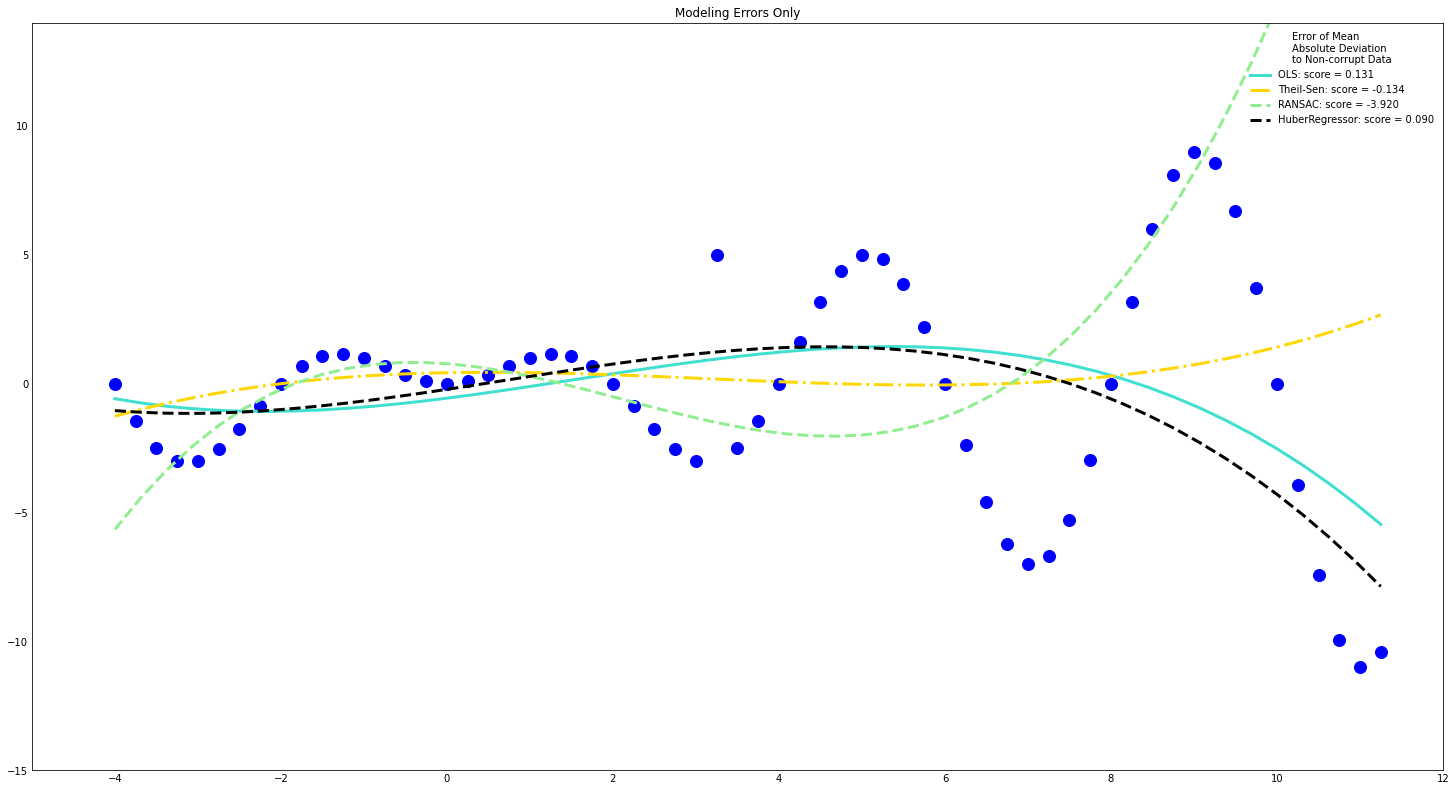

In [136]:
rng = np.random.RandomState(1)
#X = np.linspace(0, 6, 100)[:, np.newaxis]
#y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

X = td["x-value"]
#X = X_train
y = td["y-value"]
#y = y_train
# Make sure that it X is 2D
X = X[:, np.newaxis]

#X_test = np.random.normal(size=200)
#y_test = np.sin(X_test)
X_test = X_test[:, np.newaxis]

y_errors = y.copy()
y_errors[::3] = 3

X_errors = X.copy()
X_errors[::3] = 3

y_errors_large = y.copy()
y_errors_large[::3] = 10

X_errors_large = X.copy()
X_errors_large[::3] = 10

estimators = [
    ("OLS", LinearRegression()),
    ("Theil-Sen", TheilSenRegressor(random_state=42)),
    ("RANSAC", RANSACRegressor(random_state=42)),
    ("HuberRegressor", HuberRegressor()),
]
colors = {
    "OLS": "turquoise",
    "Theil-Sen": "gold",
    "RANSAC": "lightgreen",
    "HuberRegressor": "black",
}
linestyle = {"OLS": "-", "Theil-Sen": "-.", "RANSAC": "--", "HuberRegressor": "--"}
lw = 3

x_plot = np.linspace(X.min(), X.max())
for title, this_X, this_y in [
    ("Modeling Errors Only", X, y) #,
    #("Corrupt X, Small Deviants", X_errors, y),
    #("Corrupt y, Small Deviants", X, y_errors),
    #("Corrupt X, Large Deviants", X_errors_large, y),
    #("Corrupt y, Large Deviants", X, y_errors_large),
]:
    plt.figure(figsize=(20, 12))
    plt.plot(this_X[:, 0],this_y, "b+",markersize=12,marker="o")

    for name, estimator in estimators:
        model = make_pipeline(PolynomialFeatures(3), estimator)
        model.fit(this_X, this_y)
        modelscore = model.score(this_X, this_y)
        y_plot = model.predict(x_plot[:, np.newaxis])
        plt.plot(
            x_plot,
            y_plot,
            color=colors[name],
            linestyle=linestyle[name],
            linewidth=lw,
            label="%s: score = %.3f" % (name,modelscore)
        )

    legend_title = "Error of Mean\nAbsolute Deviation\nto Non-corrupt Data"
    legend = plt.legend(
        loc="upper right", frameon=False, title=legend_title #, prop=dict(size="x-small")
    )
    plt.xlim(-5, 12)
    plt.ylim(-15, 14)
    plt.title(title)
    plt.grid()
plt.show()

In [137]:
model.get_params()
model.score(X,y)
#pd.DataFrame(model.predict(X_test))

0.0904720884592024

In [138]:
#====================================================================================================

In [139]:
X_train, X_test, y_train, y_test = train_test_split(td["x-value"], td["y-value"], test_size=0.2, random_state=42)

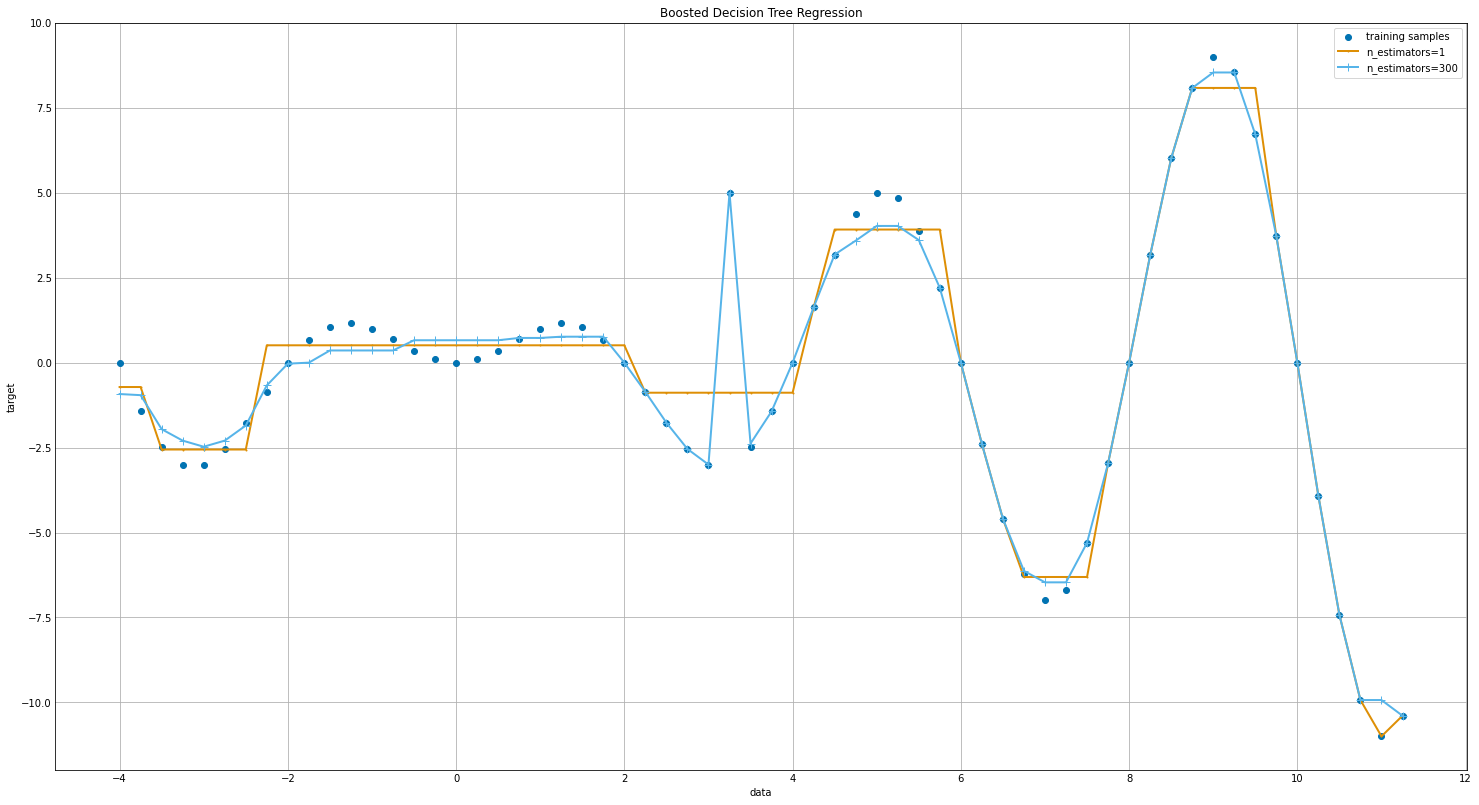

In [143]:


rng = np.random.RandomState(1)
#X = np.array(X_train[:, np.newaxis]) #(np.linspace(0, 6, 100)[:, np.newaxis]
#y = np.array(y_train[:, np.newaxis]) #np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

#X = np.linspace(0, 6, 100)[:, np.newaxis]
#y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

X = td["x-value"]
X = X[:, np.newaxis]
y = td["y-value"]
y = y[:, np.newaxis]

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=6)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=6), n_estimators=35, random_state=rng
)

regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure(figsize=(20,12))
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_1, color=colors[1], label="n_estimators=1", linewidth=2,linestyle ="-",markersize=1,marker="o")
plt.plot(X, y_2, color=colors[9], label="n_estimators=300", linewidth=2,linestyle ="-",markersize=8,marker="+")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [81]:
model.fit(X_train[:, np.newaxis],y_train[:, np.newaxis])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('huberregressor', HuberRegressor())])

In [82]:
model.score(X_train[:, np.newaxis],y_train[:, np.newaxis])

0.031657724048541724

In [83]:
td["y-value"][:, np.newaxis]

array([[-9.80118764e-16],
       [-1.43506287e+00],
       [-2.47487373e+00],
       [-3.00260848e+00],
       [-3.00000000e+00],
       [-2.54066871e+00],
       [-1.76776695e+00],
       [-8.61037723e-01],
       [ 2.45029691e-16],
       [ 6.69696007e-01],
       [ 1.06066017e+00],
       [ 1.15484942e+00],
       [ 1.00000000e+00],
       [ 6.92909649e-01],
       [ 3.53553391e-01],
       [ 9.56708581e-02],
       [ 0.00000000e+00],
       [ 9.56708581e-02],
       [ 3.53553391e-01],
       [ 6.92909649e-01],
       [ 1.00000000e+00],
       [ 1.15484942e+00],
       [ 1.06066017e+00],
       [ 6.69696007e-01],
       [ 2.45029691e-16],
       [-8.61037723e-01],
       [-1.76776695e+00],
       [-2.54066871e+00],
       [-3.00000000e+00],
       [ 5.00000000e+00],
       [-2.47487373e+00],
       [-1.43506287e+00],
       [-9.80118764e-16],
       [ 1.62640459e+00],
       [ 3.18198052e+00],
       [ 4.38842778e+00],
       [ 5.00000000e+00],
       [ 4.85036755e+00],
       [ 3.8

In [88]:
#===========================================================================================================

In [90]:
from sklearn.ensemble import IsolationForest

X = td["x-value"]
X = X[:, np.newaxis]
y = td["y-value"]
y = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = IsolationForest(max_samples=100, random_state=rng)

model.fit(X_train,y_train)

IsolationForest(max_samples=100,
                random_state=RandomState(MT19937) at 0x1CF73139140)

In [94]:
model.predict(X_test)
#model.get_params()

array([-1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1])